# Stepik ML contest - это еще что такое

## Шаг 6
Описание данных:

events_train.csv - данные о действиях, которые совершают студенты со стэпами

    step_id - id стэпа
    user_id - анонимизированный id юзера
    timestamp - время наступления события в формате unix date
    action - событие, возможные значения: 
        discovered - пользователь перешел на стэп
        viewed - просмотр шага,
        started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение,перед тем как приступить к решению практического шага
        passed - удачное решение практического шага
    
submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям

    step_id - id стэпа
    timestamp - время отправки решения в формате unix date
    submission_status - статус решения
    user_id - анонимизированный id юзера

In [1]:
import pandas as pd

event_data = pd.read_csv('data/event_data_train.csv')

# добавим колонку date для удобства
event_data['datetime'] = pd.to_datetime(event_data['timestamp'], unit ='s')
event_data['date'] = event_data.datetime.dt.date

date_first_event = event_data.date.min()
date_last_event = event_data.date.max()

event_data.head(5)

,step_id,timestamp,action,user_id,datetime,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


Дата первого и последнего события

In [2]:
print(date_first_event, date_last_event)

2015-06-15 2018-05-19


Распределение событие во времени

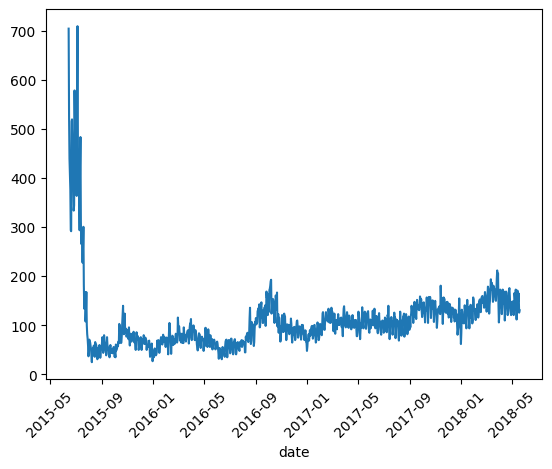

In [3]:
plt_event_data = event_data.groupby('date')['user_id'].nunique().plot()
plt_event_data.tick_params(axis='x', rotation=45) # перевернуть label для оси x


Колличество пройденных шагов. Видно вначале всплеск и дальше меньше людей решают степы. Этот спросбо не правильный т.к. из-за фильтра мы теряем пользователей (ниже будет верное решение)

198
1
650331


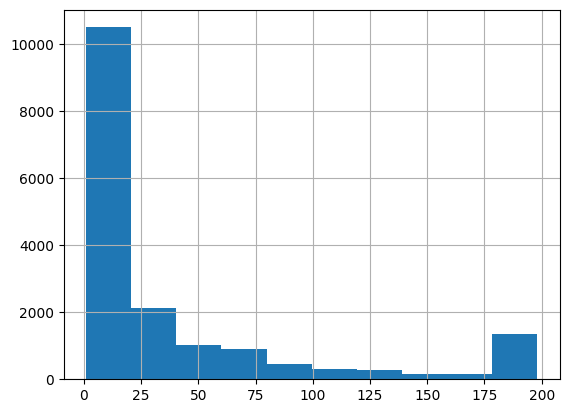

In [11]:
agg_event = event_data.query('action == "passed"').groupby('user_id', as_index=False).agg(step_count=('step_id', 'count'))

#agg_event.to_csv('agg_event.csv')
agg_event.step_count.hist()

print(agg_event.step_count.max())
print(agg_event.step_count.min())
print(agg_event.step_count.sum())

Верное решение (используем сводную таблицу):

<Axes: >

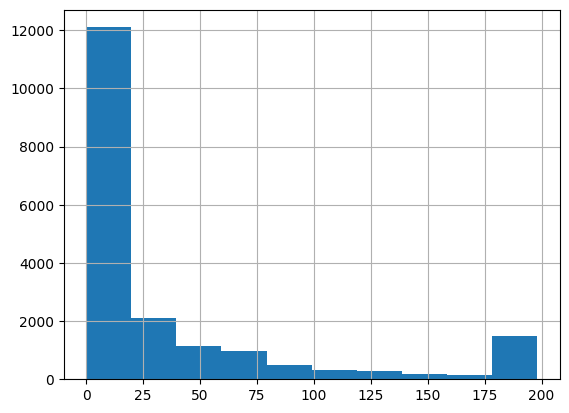

In [12]:
event_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index()['discovered'].hist()